<a href="https://colab.research.google.com/github/sedatoner/Banknote-Authentication/blob/main/Banknote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset is uploaded
   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Class distribution:
class
0    762
1    610
Name: count, dtype: int64


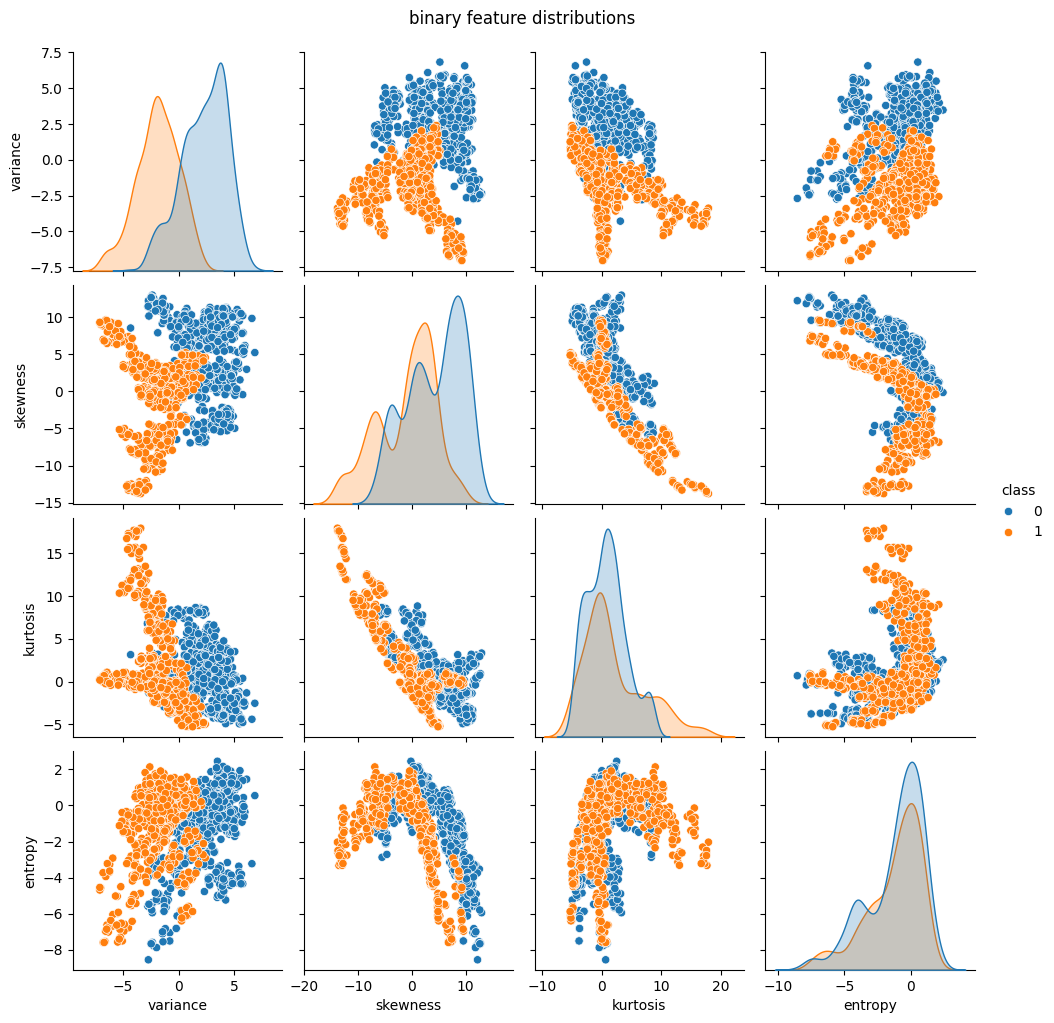


--- Criterion: gini, Max Depth: 3 ---
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       148
           1       0.93      0.87      0.90       127

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



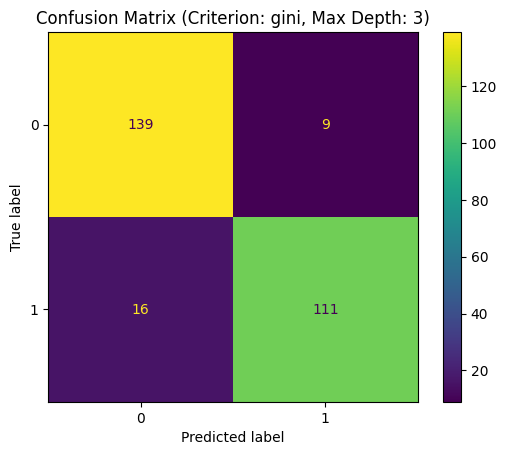


--- Criterion: gini, Max Depth: 5 ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.93      0.96       127

    accuracy                           0.97       275
   macro avg       0.97      0.96      0.97       275
weighted avg       0.97      0.97      0.97       275



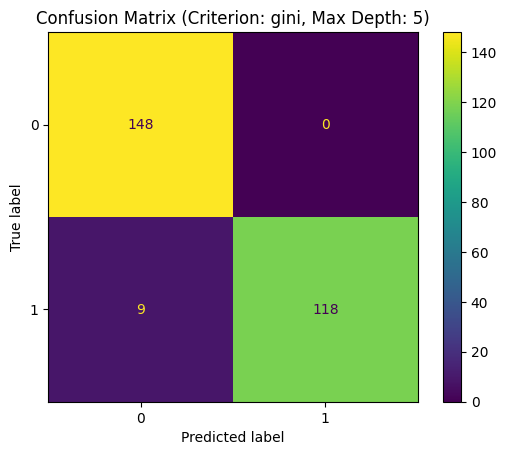


--- Criterion: gini, Max Depth: 7 ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



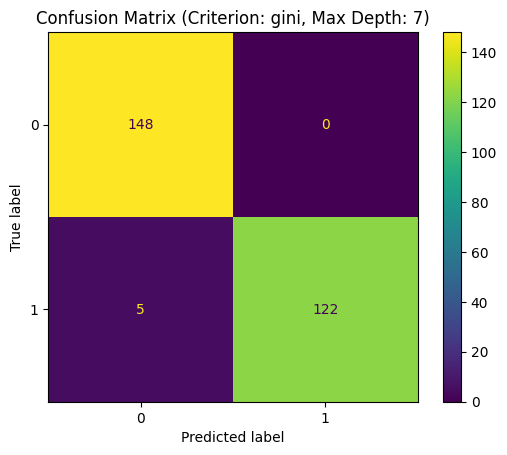


--- Criterion: entropy, Max Depth: 3 ---
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       148
           1       0.95      0.94      0.94       127

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



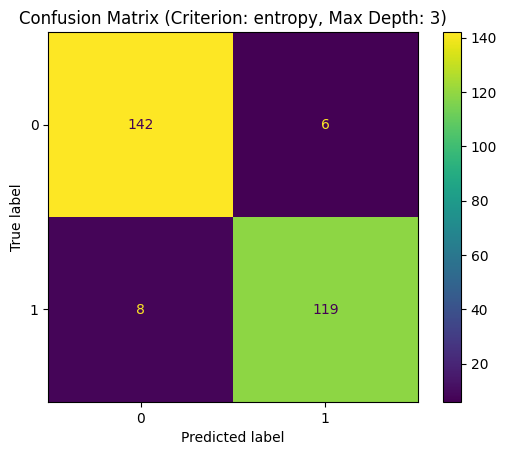


--- Criterion: entropy, Max Depth: 5 ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



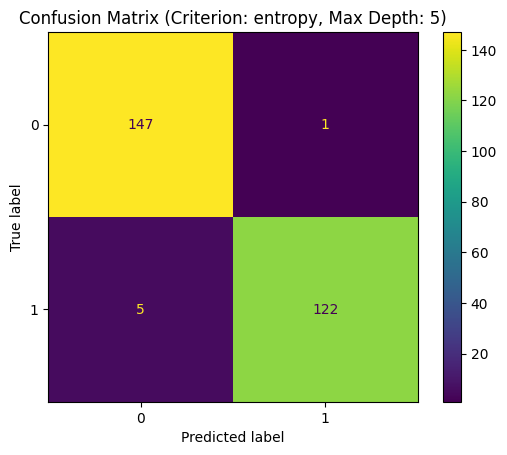


--- Criterion: entropy, Max Depth: 7 ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       148
           1       1.00      0.97      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



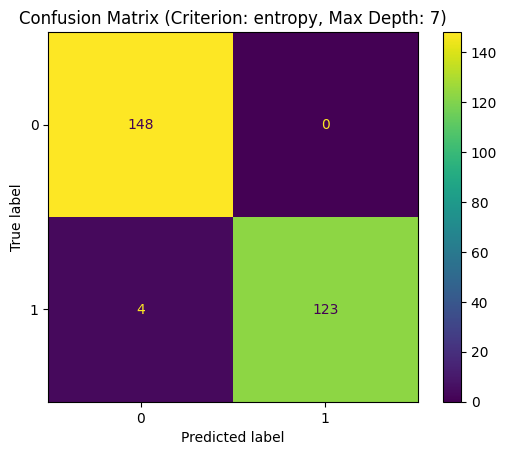

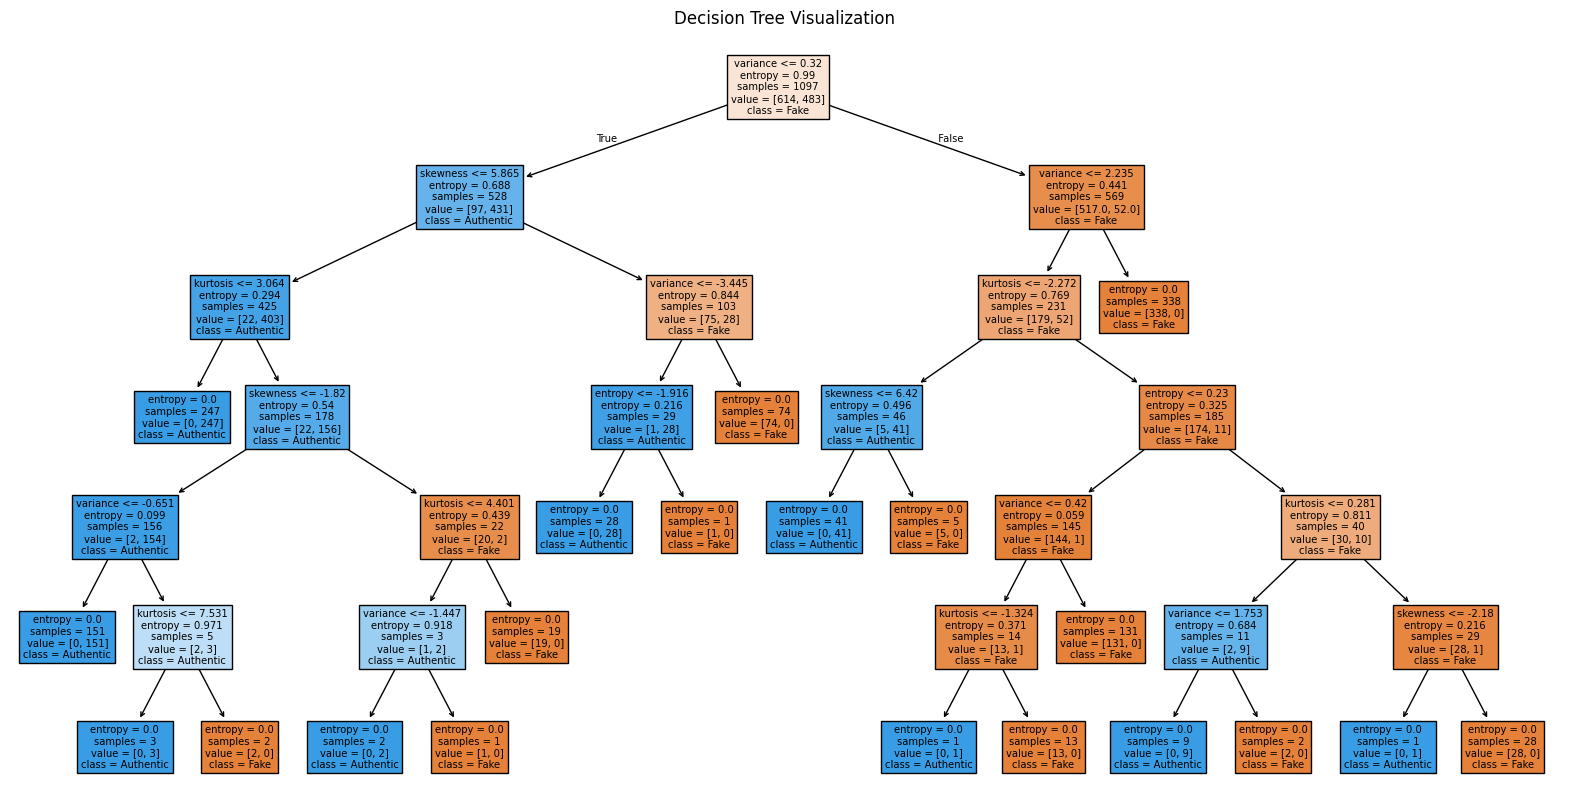

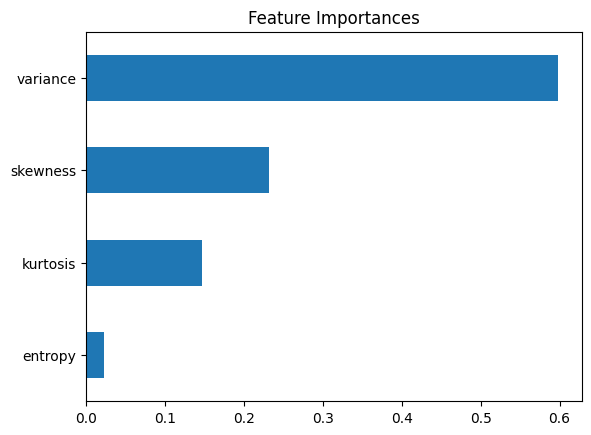

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from google.colab import drive
import requests

# grabbing the dataset straight from my Google Drive
file_id = '1xoUonHBmS-iFarordEh3RwGy8qktiBUZ'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(download_url, header=None, names=['variance', 'skewness', 'kurtosis', 'entropy', 'class'])
print("Dataset is uploaded")

# just wanted to take a quick peek at the first few rows
print(df.head())

# checking data info and class balance
print("\nDataset information:")
print(df.info())
print("\nClass distribution:")
print(df['class'].value_counts())

# here I’m visualizing the relationships between features by class
import seaborn as sns
sns.pairplot(df, hue='class', vars=['variance', 'skewness', 'kurtosis', 'entropy'])
plt.suptitle("binary feature distributions", y=1.02)
plt.show()

# splitting into training and testing sets (80/20 felt like a better balance for validation)
X = df.drop('class', axis=1)
y = df['class']
egitim_verisi, test_verisi, hedef_degisken, gercek_sonuclar = train_test_split(X, y, test_size=0.2, random_state=42)

# trying different combinations of criteria and max_depth to see what works best
for criterion in ['gini', 'entropy']:
    for max_depth in [3, 5, 7]:
        print(f"\n--- Criterion: {criterion}, Max Depth: {max_depth} ---")
        model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)
        model.fit(egitim_verisi, hedef_degisken)
        tahmin_sonuclari = model.predict(test_verisi)

        # getting a feel for how each model performs
        print(classification_report(gercek_sonuclar, tahmin_sonuclari))

        # checking confusion matrix for false negatives (really don’t wanna miss the fake ones)
        ConfusionMatrixDisplay.from_predictions(gercek_sonuclar, tahmin_sonuclari)
        plt.title(f"Confusion Matrix (Criterion: {criterion}, Max Depth: {max_depth})")
        plt.show()

# visualizing the final decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Fake', 'Authentic'])
plt.title("Decision Tree Visualization")
plt.show()

# checking which features the model cared about the most
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()
